In [14]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import time




In [15]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)
data = data.drop(15, axis=1)
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)

gnb = GaussianNB()

# ROC

In [16]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count


def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count


def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count


def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count


class ROC_curves:
    def __init__(self,
                 pred=sous_ensemble,
                 res=cible,
                 gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
      
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

# Qualité

In [17]:
class Qualite:
    def __init__(self, 
                   _modele=gnb, 
                   _data=sous_ensemble, 
                   _y=cible, 
                   _y_pred=cible,
                   _y_pred_proba=cible,
                   _cv=10,
                   _print_mode=True):
        
        self.accuracy = sklearn.metrics.accuracy_score(_y, _y_pred)
        self.AUC = sklearn.metrics.roc_auc_score(_y, _y_pred)
        self.cross_validation = cross_val_score(_modele, _data, y=_y, cv=_cv)
        self.moyenne = np.mean(self.cross_validation)
        self.ecart_type = np.std(self.cross_validation)
        self.precision = average_precision_score(_y, _y_pred)
        
        self.roc = ROC_curves(pred=_y_pred_proba, res=_y)
        
        
        if _print_mode:
            self.roc.plot_it()

# Apprentissage

In [18]:
def algo_apprentissage(mod=GaussianNB(),
                           data=sous_ensemble,
                           target=cible,
                           print_mode=True,
                           cv=10):
    X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)
    result = dict()
    mod_fit = mod.fit(X_train, y_train)
    y_prediction_proba = mod_fit.predict_proba(X_test)
    y_prediction = mod_fit.predict(X_test)
    q_mod = Qualite(_modele=mod,
                 _data=X_test,
                 _y=y_test,
                 _y_pred=y_prediction,
                 _y_pred_proba=y_prediction_proba,
                 _print_mode=print_mode,
                 _cv=cv)
    
    result['y_prediction_proba'] = y_prediction_proba
    result['y_prediction'] = y_prediction
    result['q_mod'] = q_mod
    
    if print_mode:
        print('La précision est ' + str(q_mod.accuracy))
        print('')
        print('L\'AUC est ' + str(q_mod.AUC))
        print('')
        print('Le score moyen par ' + str(cv) + ' cross-validation est ' + str(q_mod.moyenne))
    
    return result

# NaiveBayesSimple

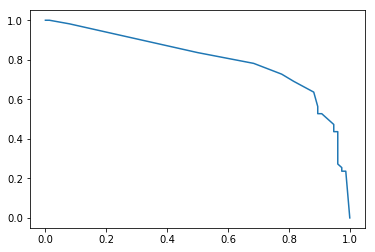

La précision est 0.740458015267

L'AUC est 0.700956937799

Le score moyen par 10 cross-validation est 0.745879120879


In [19]:
GNB = GaussianNB()
gnb = algo_apprentissage(GNB)

# Arbre CART

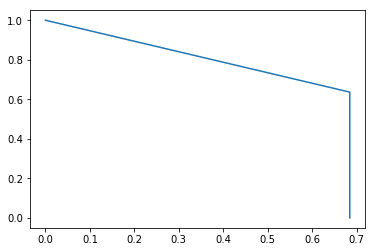

La précision est 0.664122137405

L'AUC est 0.66028708134

Le score moyen par 10 cross-validation est 0.817948717949


In [20]:
DTC = tree.DecisionTreeClassifier()
dtc = algo_apprentissage(DTC)

# Arbre ID3

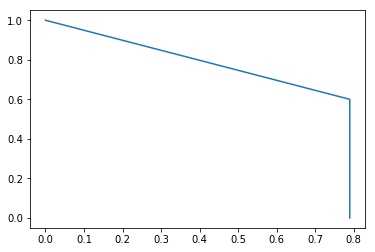

La précision est 0.709923664122

L'AUC est 0.694736842105

Le score moyen par 10 cross-validation est 0.776923076923


In [21]:
id3 = tree.DecisionTreeClassifier(criterion="entropy")
essai = algo_apprentissage(id3)

# Decision Stump

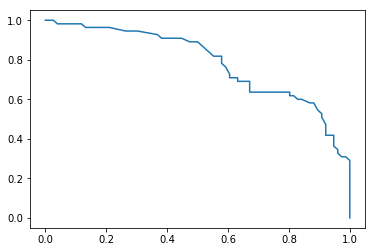

La précision est 0.732824427481

L'AUC est 0.716985645933

Le score moyen par 10 cross-validation est 0.767307692308


In [22]:
decision_stump = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)

ds = algo_apprentissage(decision_stump)

# MLP

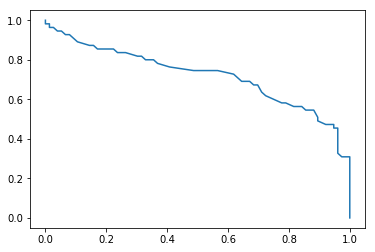

La précision est 0.69465648855

L'AUC est 0.679066985646

Le score moyen par 10 cross-validation est 0.714468864469


In [23]:
MLP = MLPClassifier(solver='lbfgs',
                    alpha=1,
                    hidden_layer_sizes=(20, 10))

mlp = algo_apprentissage(MLP)

# KNN

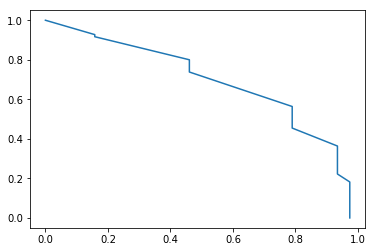

La précision est 0.69465648855

L'AUC est 0.676555023923

Le score moyen par 10 cross-validation est 0.770512820513


In [24]:
KNN = KNeighborsClassifier()
knn = algo_apprentissage(KNN)

# Bagging 

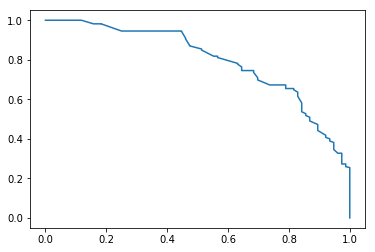

La précision est 0.748091603053

L'AUC est 0.732655502392

Le score moyen par 10 cross-validation est 0.804853479853


In [25]:
BC = BaggingClassifier(n_estimators=50)
bc = algo_apprentissage(BC)

# Adaboost

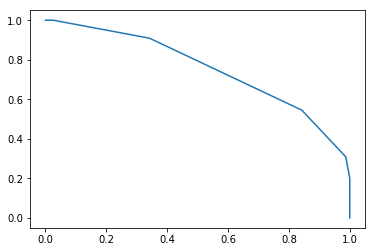

La précision est 0.717557251908

L'AUC est 0.693779904306

Le score moyen par 10 cross-validation est 0.697802197802


In [26]:
ABC = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.0,
                         algorithm='SAMME.R',
                         random_state=None)
abc = algo_apprentissage(ABC)

# RandomForest

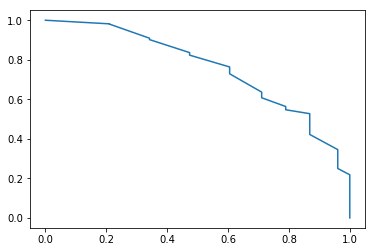

La précision est 0.69465648855

L'AUC est 0.676555023923

Le score moyen par 10 cross-validation est 0.775091575092


In [27]:
RFC = RandomForestClassifier(n_estimators=10,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=1,
                             random_state=None,
                             verbose=0,
                             warm_start=False,
                             class_weight=None)

rfc = algo_apprentissage(RFC)

In [28]:
colnames = ['Accuracy', 'AUC', 'Moyenne CV', 'Std CV', 'Temps']
algos = [KNN, DTC, id3, BC, RFC]
indexs = ['KNN', 'DTC', 'id3', 'BC', 'RFC']


final_table = []
for alg in algos:
    t1 = time.time()
    res_algo = algo_apprentissage(alg, print_mode=False)
    t2 = time.time()
    delta_t = t2 - t1
    ajout = [res_algo['q_mod'].accuracy, res_algo['q_mod'].AUC, res_algo['q_mod'].moyenne, res_algo['q_mod'].ecart_type, delta_t]
    final_table.append(ajout)
    
final_table = pd.DataFrame(final_table, columns=colnames, index=indexs)
    

In [29]:
final_table


,Accuracy,AUC,Moyenne CV,Std CV,Temps
KNN,0.694656,0.676555,0.770513,0.125371,0.079728
DTC,0.671756,0.666866,0.779853,0.074092,0.066519
id3,0.679389,0.663397,0.756136,0.126819,0.072743
BC,0.740458,0.721053,0.810806,0.071364,0.832080
RFC,0.725191,0.707895,0.763828,0.161621,0.193913
